In [1]:
#Capacity Control and Preprocessing

In [40]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
'''  
i)Here, we use a larger 11 x 11 window to capture objects.  At the sametime, we use a stride of 4 to greatly reduce the height and width of the output. 
  Here, the number of output channels is much larger than that in LeNet.
ii)Make the convolution window smaller, set padding to 2 for consistent height and width across the input and output, and increase the number of output channels.
iii)Use three successive convolutional layers and a smaller convolution window. 
Except for the final convolutional layer, the number of output channels is further increased. 
Pooling layers are not used to reduce the height and width of input after the first two convolutional layers
iv) Here, the number of outputs of the fully-connected layer is several times larger than that in LeNet. Use the dropout layer to mitigate overfitting.
v) Output layer Since we are using Fashion-MNIST, the number of  classes is 10, instead of 1000 as in the paper.


SyntaxError: ignored

In [ ]:
import tensorflow as tf



def net():
    return tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=96, kernel_size=11, strides=4,
                               activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
        tf.keras.layers.Conv2D(filters=256, kernel_size=5, padding='same',
                               activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
        tf.keras.layers.Conv2D(filters=384, kernel_size=3, padding='same',
                               activation='relu'),
        tf.keras.layers.Conv2D(filters=384, kernel_size=3, padding='same',
                               activation='relu'),
        tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same',
                               activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10)])

In [42]:
#We construct a single-channel data example with both height and width of 224 to observe the output shape of each layer.
X = tf.random.uniform((1, 224, 224, 1))
for layer in net().layers:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape:\t', X.shape)


Conv2D output shape:	 (1, 54, 54, 96)
MaxPooling2D output shape:	 (1, 26, 26, 96)
Conv2D output shape:	 (1, 26, 26, 256)
MaxPooling2D output shape:	 (1, 12, 12, 256)
Conv2D output shape:	 (1, 12, 12, 384)
Conv2D output shape:	 (1, 12, 12, 384)
Conv2D output shape:	 (1, 12, 12, 256)
MaxPooling2D output shape:	 (1, 5, 5, 256)
Flatten output shape:	 (1, 6400)
Dense output shape:	 (1, 4096)
Dropout output shape:	 (1, 4096)
Dense output shape:	 (1, 4096)
Dropout output shape:	 (1, 4096)
Dense output shape:	 (1, 10)


In [43]:
#Reading the Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)


x_train shape: (60000, 28, 28) y_train shape: (60000,)


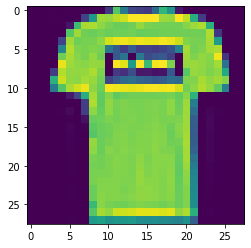

In [52]:
# Show one of the images from the training dataset
plt.imshow(x_train[1])